# Load the dataframe

In [1]:
import pandas as pd # import pandas to can read file.csv
df = pd.read_csv("data_small/TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])  # store those data into df variable. parse_dates is to separet dates witha "-"
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


# Show certanin rows:

In [2]:
df[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0
15,1,35381,1860-01-16,-9,0
16,1,35381,1860-01-17,7,0
17,1,35381,1860-01-18,-6,0
18,1,35381,1860-01-19,-16,0
19,1,35381,1860-01-20,-19,0


# Show certain columns:

In [3]:
df['   TG']  # columns TG...
df['   TG'][2] / 10  # position 2 in that column(list) divided 10.

3.1

In [4]:
df[['    DATE', '   TG']]

,DATE,TG
0,1860-01-01,21
1,1860-01-02,46
2,1860-01-03,31
3,1860-01-04,37
4,1860-01-05,31
...,...,...
59316,2022-05-27,-9999
59317,2022-05-28,-9999
59318,2022-05-29,-9999
59319,2022-05-30,-9999


# Simple Stadistics and filtering:

In [5]:
df.loc[df['   TG'] != -9999]  # is for filter real data from none data (-9999 = none data).

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
53655,1,35381,2006-11-26,80,0
53656,1,35381,2006-11-27,70,0
53657,1,35381,2006-11-28,71,0
53658,1,35381,2006-11-29,63,0


In [6]:
mean = df.loc[df['   TG'] != -9999]['   TG'].mean() / 10
print(mean)

6.360787526128467


In [7]:
mean = df.loc[df['   TG'] != -9999]['   TG'].max() / 10
print(mean)

26.2


In [8]:
mean = df.loc[df['   TG'] != -9999]['   TG'].min() / 10
print(mean)

-28.8


<Axes: >

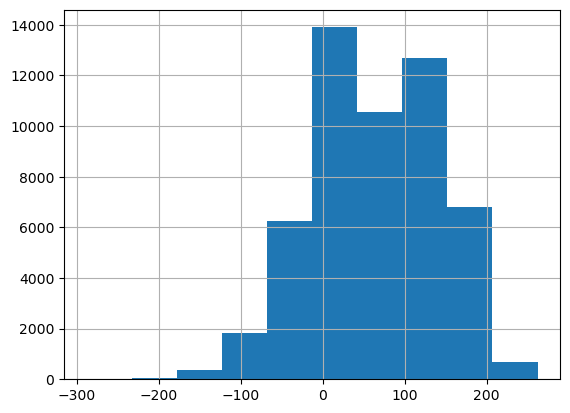

In [9]:
df.loc[df['   TG'] != -9999]['   TG'].hist()

# Get certain cells and an explicit value of those cells:

In [10]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


In [11]:
df.loc[df['    DATE']=='1860-01-05']['   TG'].squeeze() / 10  # with squeeze we get/extract an explicit value froim a cells row.

3.1

In [12]:
df.loc[df['   TG'] == df['   TG'].max()]  # get the row where is the max value of TG.

,STAID,SOUID,DATE,TG,Q_TG
3150,1,35381,1868-08-16,262,0


In [13]:
df.loc[3, '   TG']

37

# Calculate a new column out of existing column:

In [14]:
import numpy as np
df['TG0'] = df['   TG'].mask(df['   TG']==-9999, np.nan)  # with this we create a new column where value -9999 is replaced by np.nan value.
df

,STAID,SOUID,DATE,TG,Q_TG,TG0
0,1,35381,1860-01-01,21,0,21.0
1,1,35381,1860-01-02,46,0,46.0
2,1,35381,1860-01-03,31,0,31.0
3,1,35381,1860-01-04,37,0,37.0
4,1,35381,1860-01-05,31,0,31.0
...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN
59317,1,35381,2022-05-28,-9999,9,NaN
59318,1,35381,2022-05-29,-9999,9,NaN
59319,1,35381,2022-05-30,-9999,9,NaN


In [15]:
df['TG'] = df['TG0'] / 10  # this wiil create a new column in the data frame.
df

,STAID,SOUID,DATE,TG,Q_TG,TG0,TG
0,1,35381,1860-01-01,21,0,21.0,2.1
1,1,35381,1860-01-02,46,0,46.0,4.6
2,1,35381,1860-01-03,31,0,31.0,3.1
3,1,35381,1860-01-04,37,0,37.0,3.7
4,1,35381,1860-01-05,31,0,31.0,3.1
...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN


In [16]:
df['Fahrenheit'] = (df['TG0'] * (9/5)) + 32
df

,STAID,SOUID,DATE,TG,Q_TG,TG0,TG,Fahrenheit
0,1,35381,1860-01-01,21,0,21.0,2.1,69.8
1,1,35381,1860-01-02,46,0,46.0,4.6,114.8
2,1,35381,1860-01-03,31,0,31.0,3.1,87.8
3,1,35381,1860-01-04,37,0,37.0,3.7,98.6
4,1,35381,1860-01-05,31,0,31.0,3.1,87.8
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN,NaN


# Plotting:

<Axes: >

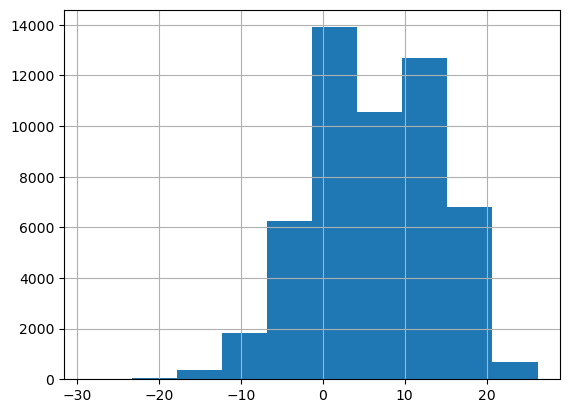

In [17]:
df['TG'].hist()

<Axes: xlabel='    DATE'>

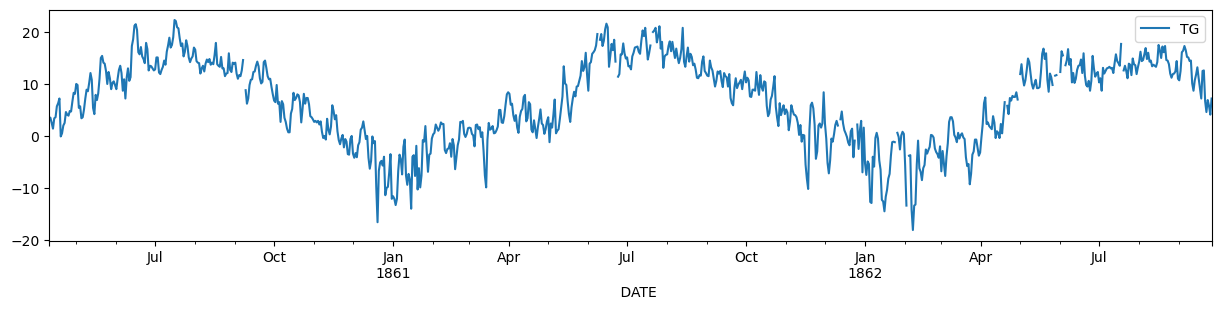

In [18]:
df[100:1000].plot(x='    DATE', y='TG', figsize=(15,3))